In [107]:
import importlib
import graphviz
import graph
import graph_games
import game_solver
from typing import Union
importlib.reload(graph)
importlib.reload(graph_games)
importlib.reload(game_solver)



<module 'game_solver' from '/home/nemo/Graph_Game_Design/game_solver.py'>

{}
2 {'0', '4', '3', '6'} []
1 {'4', '13'} []
5 {'3', '6', '14', '12', '0'} []
4 {'2', '1', '8', '15', '10'} [('4', '2'), ('4', '1')]
3 {'2', '8', '5'} [('3', '2'), ('3', '5')]
8 {'7', '9', '4', '3'} [('8', '4'), ('8', '3')]
6 {'2', '11', '5'} [('6', '2'), ('6', '5')]
11 {'13', '6', '12', '0', '9'} [('11', '6')]
13 {'1', '14', '15', '12', '0', '11'} [('13', '1'), ('13', '11')]
14 {'5', '13', '7', '9', '10'} [('14', '5'), ('14', '13')]
15 {'0', '4', '13'} [('15', '4'), ('15', '13')]
7 {'14', '9', '8'} [('7', '14'), ('7', '8')]
12 {'0', '5', '11', '13'} [('12', '5'), ('12', '11'), ('12', '13')]
0 {'2', '5', '13', '15', '12', '11'} [('0', '2'), ('0', '5'), ('0', '13'), ('0', '15'), ('0', '12'), ('0', '11')]
9 {'14', '7', '11', '8'} [('9', '14'), ('9', '7'), ('9', '11'), ('9', '8')]
10 {'14', '4'} [('10', '14'), ('10', '4')]


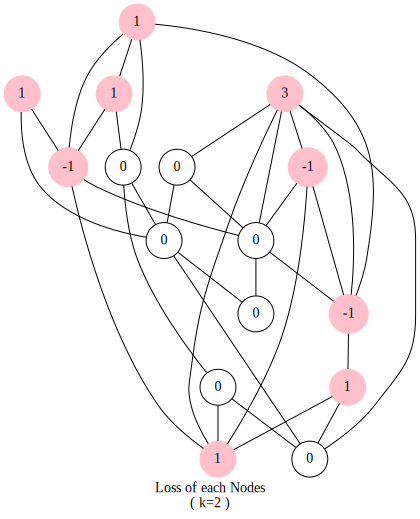

In [135]:
def visualize(g: Union[graph.Graph, graph_games.Game]) -> graphviz.Graph:
    if isinstance(g, graph.Graph):
        dot = graphviz.Graph()
        drawn = set()
        for ni in g.nodes:
            dot.attr('node', shape='circle')
            drawn.add(ni)
            dot.node(ni)
            #print(list((ni, nj) for nj in g.edges[ni]))
            dot.edges((ni,nj) for nj in g.edges[ni] if nj in drawn)
        return dot
    if isinstance(g, graph_games.K_DominationGame):
        dot = graphviz.Graph()
        drawn = set()
        print(dot.node_attr)
        for ni in g.graph.nodes:
            if ni in g.dominators:
                dot.attr('node', shape='circle', style='filled', color='pink')
            else:
                dot.attr('node', shape='circle', style='', color='black')
            dot.node(ni, str(g.getUtil(ni)))
            drawn.add(ni)
            dot.edges((ni,nj) for nj in g.graph.neighbors(ni) if nj in drawn)
        dot.attr(label=f'Loss of each Nodes \n ( k={g.k} )')
        return dot

g = graph.randomWSGraph(n=16, k=4, link_rewiring_prob=0.5)
gg = graph_games.K_DominationGame(2, g)
gg.randomInit()
visualize(gg)


{}
2 {'0', '4', '3', '6'} []
1 {'4', '13'} []
5 {'3', '6', '14', '12', '0'} []
4 {'2', '1', '8', '15', '10'} [('4', '2'), ('4', '1')]
3 {'2', '8', '5'} [('3', '2'), ('3', '5')]
8 {'7', '9', '4', '3'} [('8', '4'), ('8', '3')]
6 {'2', '11', '5'} [('6', '2'), ('6', '5')]
11 {'13', '6', '12', '0', '9'} [('11', '6')]
13 {'1', '14', '15', '12', '0', '11'} [('13', '1'), ('13', '11')]
14 {'5', '13', '7', '9', '10'} [('14', '5'), ('14', '13')]
15 {'0', '4', '13'} [('15', '4'), ('15', '13')]
7 {'14', '9', '8'} [('7', '14'), ('7', '8')]
12 {'0', '5', '11', '13'} [('12', '5'), ('12', '11'), ('12', '13')]
0 {'2', '5', '13', '15', '12', '11'} [('0', '2'), ('0', '5'), ('0', '13'), ('0', '15'), ('0', '12'), ('0', '11')]
9 {'14', '7', '11', '8'} [('9', '14'), ('9', '7'), ('9', '11'), ('9', '8')]
10 {'14', '4'} [('10', '14'), ('10', '4')]


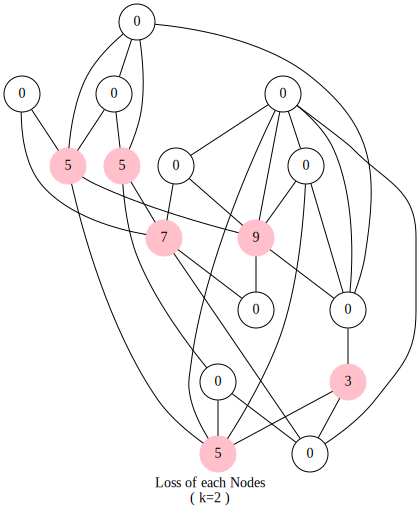

In [136]:
game_solver.bestResponseSolver(gg)
visualize(gg)

In [137]:
gg.checkDomination()

True